## Evaluation Phase

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sys


from collections import namedtuple

%matplotlib inline
#
from evaluation import *
from approximator import *
from q_learning_nn import *

sys.path.append(r'../')
import QlernNN_WangJingyan

#import environment
sys.path.append(r'../virl')
import virl

import time
from datetime import date

## load storage to evaluate

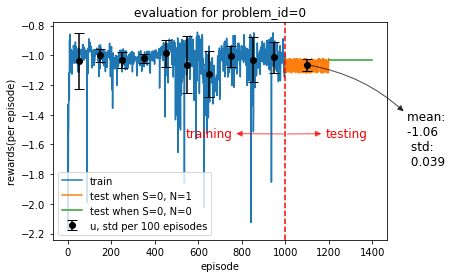

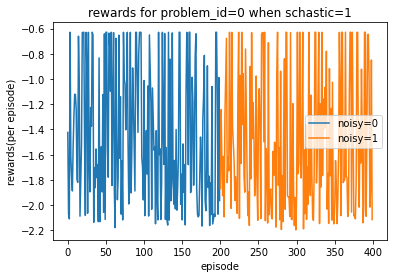

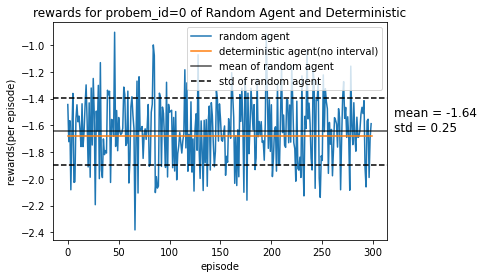

In [29]:
problem_id = 0

data_path = './data'
stats_train = load_variable(r"{}/stats_training/stats_train0{}.dat".format(data_path, problem_id))
stats_evaluation_00 = load_variable(r"{}/stats_evaluation/stats_eval0{}_00.dat".format(data_path, problem_id ))
stats_evaluation_01 = load_variable(r"{}/stats_evaluation/stats_eval0{}_01.dat".format(data_path, problem_id ))
stats_evaluation_10 = load_variable(r"{}/stats_evaluation/stats_eval0{}_10.dat".format(data_path, problem_id ))
stats_evaluation_11 = load_variable(r"{}/stats_evaluation/stats_eval0{}_11.dat".format(data_path, problem_id ))

#load random agent and deterministic agent when s
stats_random = load_variable(r"../RandomAgent_WangJingyan/data/stats_training/stats_train0{}_01.dat".format(problem_id))
stats_determ = load_variable(r"../Deterministic_WangJingyan/data/stats_training/stats_train0{}_01.dat".format(problem_id))
stats_random_mean = np.mean(stats_random.episode_rewards)
stats_random_std = np.std(stats_random.episode_rewards)

#calculate std and mean
train_rewards_resized = np.resize(stats_train.episode_rewards, (len(stats_train.episode_rewards)//100, 100))
train_rewards_mean = np.mean(train_rewards_resized, axis=1)
train_rewards_std = np.std(train_rewards_resized, axis=1)

#find convergence point


#calculate test mean
test_mean = np.mean(stats_evaluation_01.episode_rewards)
test_std = np.std(stats_evaluation_01.episode_rewards)

#plot result
plt.figure()
plt.title("evaluation for problem_id={}".format(problem_id))
plt.xlabel("episode")
plt.ylabel("rewards(per episode)")

#plot lines
plt.plot(stats_train.episode_rewards, label="train")

x01 = np.arange(0, len(stats_evaluation_01.episode_rewards), 1)
x01 += len(stats_train.episode_rewards)
plt.plot(x01, stats_evaluation_01.episode_rewards, label = "test when S=0, N=1" )

x00 = np.arange(0, len(stats_evaluation_00.episode_rewards), 1)
x00 = x00 + len(stats_train.episode_rewards)+len(stats_evaluation_01.episode_rewards)
plt.plot(x00, stats_evaluation_00.episode_rewards, label = "test when S=0, N=0")

##add annotate adn axvline
plt.axvline(len(stats_train.episode_rewards), color='r', linestyle='--')
plt.annotate('testing', xy=(len(stats_train.episode_rewards), stats_evaluation_01.episode_rewards[0]-0.5),                       
            xycoords='data',
            xytext=(40, -3), textcoords='offset pixels', fontsize = 12,
            arrowprops=dict(arrowstyle='<|-', color='r', alpha=0.7),
            color = 'r'
            )
plt.annotate('training', xy=(len(stats_train.episode_rewards), stats_evaluation_01.episode_rewards[0]-0.5),                       
            xycoords='data',
            xytext=(-100, -3), textcoords='offset pixels', fontsize = 12,
            arrowprops=dict(arrowstyle='<|-', color='r', alpha=0.7),
            color = 'r', zorder = 40
            )
plt.errorbar(1100, test_mean, yerr=test_std, fmt='o', color='k', capsize=5, zorder=30)
plt.annotate("mean={}\nstd={}".format(round(test_mean, 2), round(test_std,3)), xy=(1100, test_mean),
            xycoords='data',
            xytext=(100, -100), textcoords='offset pixels', fontsize = 12,
            arrowprops=dict(arrowstyle='<|-', color='k', alpha=0.7, connectionstyle='arc3, rad=.2'),
            color='k')

##plot error bar
error_x = np.array([])
for i in range(len(train_rewards_mean)):
    error_x = np.append(error_x, i*100+50)
plt.errorbar(error_x, train_rewards_mean, yerr=train_rewards_std, fmt='o', color='k', capsize=5, label="u, std per 100 episodes",zorder=30)
plt.legend(loc="lower left")
#figure2
plt.figure()
plt.title("rewards for problem_id={} when schastic=1".format(problem_id))
plt.xlabel("episode")
plt.ylabel("rewards(per episode)")
plt.plot(stats_evaluation_10.episode_rewards, label="noisy=0")

x11 = np.arange(0, len(stats_evaluation_11.episode_rewards), 1)
x11 +=len(stats_evaluation_10.episode_rewards)
plt.plot(x11, stats_evaluation_11.episode_rewards, label="noisy=1")
plt.legend()


#figure3
fig = plt.figure()
ax = fig.add_subplot(111)
ax.text(320, stats_random_mean, "mean = {}\nstd = {}".format(round(stats_random_mean,2), round(stats_random_std, 2)), fontsize=12)
plt.title("rewards for probem_id={} of Random Agent and Deterministic".format(problem_id))
plt.xlabel("episode")
plt.ylabel("rewards(per episode)")
plt.plot(stats_random.episode_rewards[:len(stats_determ.episode_rewards)-1], label="random agent")
plt.plot(stats_determ.episode_rewards, label="deterministic agent(no interval)")
plt.axhline(stats_random_mean, color='k', alpha =0.7, label="mean of random agent")
plt.axhline(stats_random_mean+stats_random_std, color='k', ls='--')
plt.axhline(stats_random_mean-stats_random_std, color='k', ls='--', label="std of random agent")
plt.legend()